In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [5]:
nyc_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-12-11/nyc_restaurants.csv")

In [6]:
nyc_df.shape

(300000, 13)

In [7]:
nyc_df['inspection_date'].str[-4:].value_counts()

2018    112606
2017     78047
2016     73750
2015     34339
1900       796
2014       453
2013         7
2012         2
Name: inspection_date, dtype: int64

In [8]:
nyc_df_drop_na = nyc_df[nyc_df['grade'].notna()]
nyc_df_drop_na['inspection_date'].str[-4:].value_counts()

2018    57857
2017    38895
2016    37846
2015    16647
2014      202
2012        2
2013        2
Name: inspection_date, dtype: int64

In [58]:
nyc_df_cleaned = nyc_df_drop_na.loc[(nyc_df['grade'] != 'Not Yet Graded') & (nyc_df['boro'] != 'Missing')]
nyc_df_cleaned['grade'].value_counts()

A    119638
B     19215
C      5888
Z      3316
P      1819
Name: grade, dtype: int64

In [10]:
119647/149855

0.7984184711888158

In [11]:
nyc_df_cleaned.loc[nyc_df_cleaned['grade'] != 'A', 'grade'] = 'F'
nyc_df_cleaned['grade'].value_counts()

A    119647
F     30238
Name: grade, dtype: int64

In [12]:
train_df, test_df = train_test_split(nyc_df_cleaned, test_size=0.25, random_state=123)

In [13]:
train_df['grade'].value_counts()

A    89789
F    22624
Name: grade, dtype: int64

In [14]:
test_df['grade'].value_counts()

A    29858
F     7614
Name: grade, dtype: int64

In [15]:
score_hist = (
    alt.Chart(train_df).mark_bar(opacity=0.5).encode(
    alt.X('score', bin=True, scale=alt.Scale(domain=[0, 100]), title='Score'),
    alt.Y('count()'),
    alt.Color('grade', scale=alt.Scale(scheme='dark2'), title='Grade')
))

In [16]:
score_dens_plot = (
    alt.Chart(
    train_df
).transform_density(
    'score',
    groupby=['grade'],
    as_=['score', 'density'],
    extent=[0, 80],
).mark_area(opacity=0.4).encode(
    alt.X('score', title='Score'),
    alt.Y('density:Q', title='Density'),
    alt.Color('grade', scale=alt.Scale(scheme='dark2'), title='Grade')
))

In [17]:
score_dists = (score_hist | score_dens_plot).properties(title='Distribution of Scores by Grade')

In [24]:
# score_dists.save('score_dists.png')

/Users/lzung/opt/miniconda3/envs/571/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


/Users/lzung/opt/miniconda3/envs/571/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


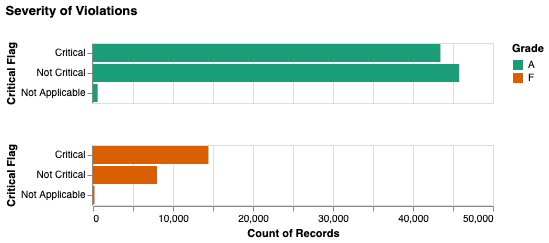

In [63]:
alt.Chart(train_df).mark_bar().encode(
    alt.X('count()'),
    alt.Y('critical_flag', title='Critical Flag', sort='-x'),
    alt.Color('grade', scale=alt.Scale(scheme='dark2'), title='Grade')
).facet(
    alt.Row('grade', header=alt.Header(labelExpr="''"), title=None),
    columns=1
).properties(title='Severity of Violations')

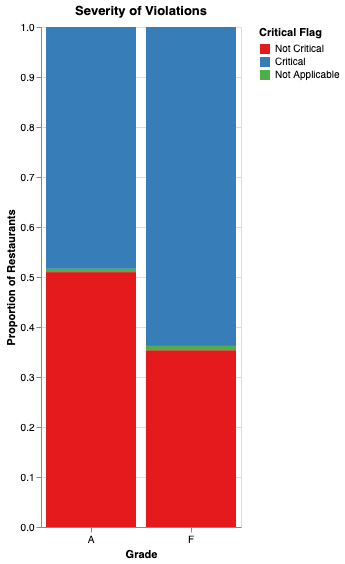

In [121]:
alt.Chart(train_df).mark_bar().encode(
    alt.X('grade', axis=alt.Axis(labelAngle=0), title='Grade'),
    alt.Y('count()', stack='normalize', title='Proportion of Restaurants'),
    alt.Color('critical_flag', scale=alt.Scale(scheme='set1'), title='Critical Flag', sort='-x')
).properties(title='Severity of Violations', height=500, width=200)

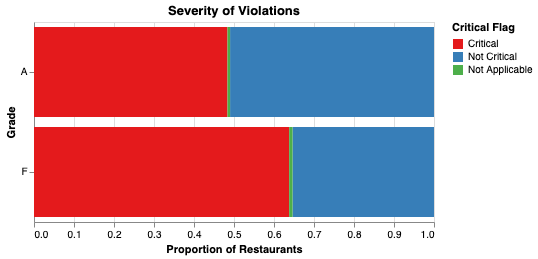

In [122]:
alt.Chart(train_df).mark_bar().encode(
    alt.X('count()', stack='normalize', title='Proportion of Restaurants'),
    alt.Y('grade', title='Grade'),
    alt.Color('critical_flag', scale=alt.Scale(scheme='set1'), title='Critical Flag', sort='-x')
).properties(title='Severity of Violations', height=200)

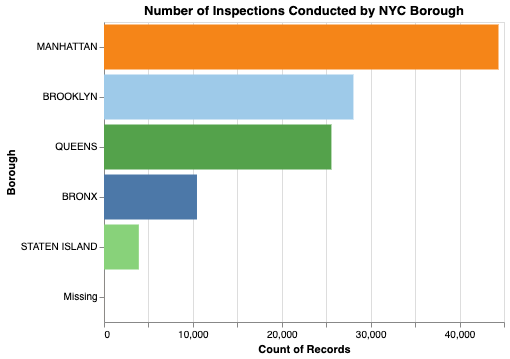

In [123]:
alt.Chart(train_df).mark_bar().encode(
    alt.X('count()'),
    alt.Y('boro', title='Borough', sort='-x'),
    alt.Color('boro', scale=alt.Scale(scheme='tableau20'), legend=None)
).properties(height=300, title='Number of Inspections Conducted by NYC Borough')

In [133]:
train_df['cuisine_description'].value_counts()[:35]

American                                                            25312
Chinese                                                             11476
CafÃ©/Coffee/Tea                                                     5832
Pizza                                                                5049
Italian                                                              4610
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     4566
Mexican                                                              4275
Japanese                                                             3891
Caribbean                                                            3506
Bakery                                                               3427
Spanish                                                              3015
Pizza/Italian                                                        2280
Donuts                                                               2116
Chicken                               

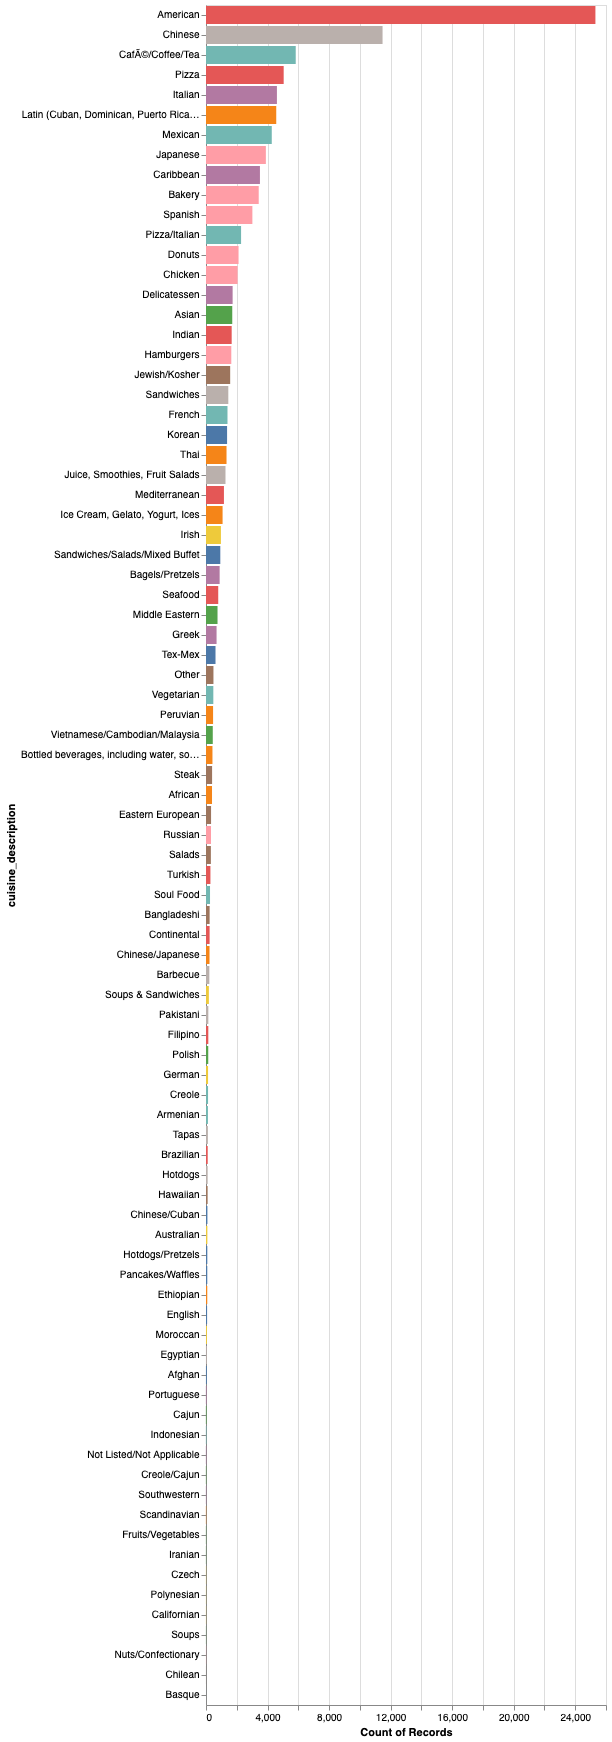

In [127]:
alt.Chart(
    train_df,
).mark_bar().encode(
    alt.X('count()'),
    alt.Y('cuisine_description', sort='-x'),
    alt.Color('cuisine_description', legend=None)
).transform_window(
    rank='rank(count())',
    sort=[alt.SortField('count()', order='descending')]
).transform_filter(
    alt.datum.rank < 10
)

In [92]:
train_df

,camis,dba,boro,zipcode,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,inspection_type
216669,40810476,FUNTOPIA USA,QUEENS,11379.0,American,02/07/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,3.0,A,Cycle Inspection / Initial Inspection
31534,50048697,DYCKMAN BILLIARDS CAFE,MANHATTAN,10040.0,American,08/13/2018,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,30.0,F,Cycle Inspection / Re-inspection
66211,41566907,LAS PANTERAS NEGRAS RESTAURANT,MANHATTAN,10029.0,Mexican,07/03/2017,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,19.0,F,Cycle Inspection / Re-inspection
223874,50004309,KFC,QUEENS,11432.0,American,10/19/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,Cycle Inspection / Initial Inspection
4933,40618281,PASQUALE'S RIGOLETTO RESTAURANT,BRONX,10458.0,Italian,02/05/2018,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,13.0,A,Cycle Inspection / Re-inspection
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293106,50033970,DOMINO'S,QUEENS,11375.0,Pizza,03/13/2017,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,12.0,A,Cycle Inspection / Initial Inspection
239781,50043970,LA ISLA CUCHIFRITOS,BRONX,10455.0,"Latin (Cuban, Dominican, Puerto Rican, South &...",08/23/2016,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,12.0,A,Cycle Inspection / Re-inspection
35352,40929097,PIANOS,MANHATTAN,10002.0,American,03/26/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,3.0,A,Cycle Inspection / Initial Inspection
55999,41426077,GEORGIO'S PIZZERIA,MANHATTAN,10004.0,Pizza,08/22/2018,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,12.0,A,Cycle Inspection / Re-inspection
